**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
vec = dir(txt_fdiry)
for(txt in vec){cat(txt, "\n")}

matrix.annotation.encode_chipseq_flagship.tsv 
matrix.annotation.encode_chipseq_full.tsv 
matrix.annotation.encode_chipseq_histone.tsv 
matrix.annotation.encode_chipseq_subset.tsv 
matrix.annotation.encode_chromatin_states.ccres.tsv 
matrix.annotation.encode_chromatin_states.chromhmm.tsv 
matrix.annotation.encode_chromatin_states.full.tsv 
matrix.annotation.fcc_peak_call.tsv 
matrix.annotation.genome_tss.tsv 
matrix.annotation.merge.fcc.tss.chipseq.tsv 
region.annotation.encode_chipseq_flagship.tmp.tsv 
region.annotation.encode_chipseq_flagship.tsv 
region.annotation.encode_chipseq_histone.tsv 
region.annotation.encode_chipseq_subset.tsv 
region.annotation.encode_chromatin_states.tsv 
region.annotation.encode_e2g_benchmark.tsv 
region.annotation.fcc_astarr_csaw.tsv 
region.annotation.fcc_crispri_growth.tsv 
region.annotation.fcc_crispri_hcrff.tsv 
region.annotation.fcc_mpra_agarwal2023.tsv 
region.annotation.fcc_starrmpra_junke.tsv 
region.annotation.genome_tss.tsv 
region.annotation.m

In [96]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.fcc_peak_call.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc_label = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 155926     19


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repress_GCFilter,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0


## Arrange table

In [93]:
fun_str_map = function(vec_txt_input){
    vec_txt_output = fun_str_map_match(
        vec_txt_input   = vec_txt_input,
        vec_txt_pattern = c("TSS:Enhancer",    "TSS:Silencer",        "Enhancer",      "Silencer"),
        vec_txt_replace = c("Proximal:Active", "Proximal:Repressive", "Distal:Active", "Distal:Repressive"),
    )    
    return(vec_txt_output)
}

In [94]:
dat = dat_region_annot_fcc_starrmpra

table(dat$Type)


         Enhance          Repress Repress_GCFilter 
           43993            65401            46532 

In [99]:
dat = dat_region_annot_fcc_starrmpra
vec = c("Enhance", "Repress")
dat = dat %>% 
    dplyr::filter(Type %in% vec) %>%
    dplyr::filter(Num_Assay > 1)

dat = dat %>% dplyr::mutate(Label = fun_str_map(Label3))


dat_region_annot_fcc_filter = dat

print(dim(dat))
cat("\n")
print(table(dat$Label1))
cat("\n")
print(table(dat$Label2))
cat("\n")
print(table(dat$Label3))
cat("\n")
print(table(dat$Label))

[1] 18346    20


Enhancer Silencer 
   16597     1749 


Enhancer Promoter Silencer 
   11623     5083     1640 


    Enhancer     Silencer TSS:Enhancer TSS:Silencer 
       11623         1640         4974          109 


      Distal:Active   Distal:Repressive     Proximal:Active Proximal:Repressive 
              11623                1640                4974                 109 


In [100]:
dat = dat_region_annot_fcc_filter

dat1 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_Total,
        Signif = Signif_CRISPR_Total,
    ) 

dat2 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_Growth,
        Signif = Signif_CRISPR_Growth
    ) 

dat3 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_HCRFF,
        Signif = Signif_CRISPR_HCRFF
    ) 

dat4 = dat %>%
    dplyr::mutate(
        Screen = Screen_CRISPR_E2G,
        Signif = Signif_CRISPR_E2G
    ) 

lst = list(
    "CRISPR-Total"   = dat1,
    "CRISPRi-Growth" = dat2,
    "CRISPRi-HCRFF"  = dat3,
    "CRISPR-E2G"     = dat4
)

lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(Region, Label, Screen, Signif) %>%
        dplyr::distinct()
    return(dat)
})

lst_region_annot = lst

In [101]:
dat = lst[[1]]
head(dat)

Region,Label,Screen,Signif
<chr>,<chr>,<dbl>,<dbl>
chr1:778233-779389,Distal:Active,1,0
chr1:958722-959968,Proximal:Active,1,0
chr1:960468-961615,Proximal:Active,1,0
chr1:1005094-1005553,Distal:Active,1,0
chr1:1013154-1014482,Proximal:Active,1,0
chr1:1059012-1060137,Distal:Active,1,0


In [103]:
### init
dat = dat_region_annot_fcc_filter
dat = dat %>% 
    dplyr::select(Region, Label) %>%
    dplyr::distinct()

###
res = table(dat$Label)
dat = as.data.frame(res)
colnames(dat) = c("Label", "Count")

###
dat = dat %>%
    dplyr::mutate(
        Count_Text = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000, 1), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Count_Text, ")"))

dat_label_count = dat
dat

Label,Count,Count_Text,Label_Text
<fct>,<int>,<chr>,<chr>
Distal:Active,11623,11.6K,Distal:Active (11.6K)
Distal:Repressive,1640,1.6K,Distal:Repressive (1.6K)
Proximal:Active,4974,5K,Proximal:Active (5K)
Proximal:Repressive,109,109,Proximal:Repressive (109)


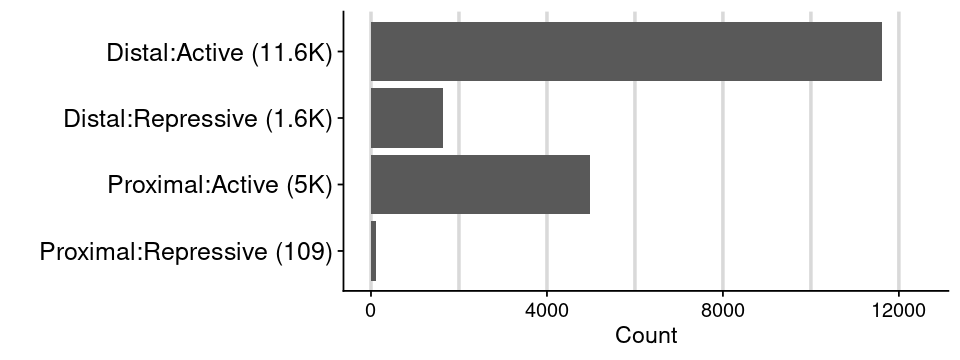

In [107]:
dat = dat_label_count

vec = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
dat = dat %>% 
    dplyr::mutate(Label = factor(Label, levels=rev(vec))) %>% 
    dplyr::arrange(Label) %>%
    dplyr::mutate(Label_Text = factor(Label_Text, levels=Label_Text))

gpt = ggplot(dat, aes(y = Label_Text, x = Count)) + 
    geom_bar(stat = "identity") +
    labs(y = "") +
    xlim(0, 12500) +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [108]:
lst = lst_region_annot
dat = lst[[1]]
head(dat)

Region,Label,Screen,Signif
<chr>,<chr>,<dbl>,<dbl>
chr1:778233-779389,Distal:Active,1,0
chr1:958722-959968,Proximal:Active,1,0
chr1:960468-961615,Proximal:Active,1,0
chr1:1005094-1005553,Distal:Active,1,0
chr1:1013154-1014482,Proximal:Active,1,0
chr1:1059012-1060137,Distal:Active,1,0


In [109]:
lst = lst_region_annot
dat = lst[[1]]

dat = dat %>% 
    dplyr::mutate(Screen = ifelse(Screen == 1, "Screened", "Not Screened")) %>%
    dplyr::distinct()
head(dat, 10)

Region,Label,Screen,Signif
<chr>,<chr>,<chr>,<dbl>
chr1:778233-779389,Distal:Active,Screened,0
chr1:958722-959968,Proximal:Active,Screened,0
chr1:960468-961615,Proximal:Active,Screened,0
chr1:1005094-1005553,Distal:Active,Screened,0
chr1:1013154-1014482,Proximal:Active,Screened,0
chr1:1059012-1060137,Distal:Active,Screened,0
chr1:1063762-1064534,Distal:Active,Screened,0
chr1:1068587-1070616,Distal:Active,Screened,1
chr1:1074035-1074340,Distal:Active,Not Screened,0


In [110]:
lst = lst_region_annot

lst = lapply(lst, function(dat){
    ### Init label
    dat = dat %>% 
        dplyr::mutate(Screen = ifelse(Screen == 1, "Screened", "Not Screened")) %>%
        dplyr::distinct()

    ### Summarize by counting each label
    dat = dat %>%
        dplyr::group_by(Label, Screen) %>%
        dplyr::summarise(Count = n(), .groups = "drop") %>%
        dplyr::group_by(Label) %>%
        dplyr::mutate(Total = sum(Count)) %>%
        dplyr::ungroup() %>%
        dplyr::mutate(Freq = Count / Total)

    ### Generate label for plotting
    tmp = dat %>%
        dplyr::filter(Screen == "Screened") %>%
        dplyr::mutate(Freq_Label = paste0(round(Freq * 100, 1), "%")) %>%
        dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Label, ")") )%>%
        dplyr::select(Label, Label_Text)

    ### Merge the label back to the table
    dat = dplyr::left_join(dat, tmp, by = "Label")
    return(dat)
})

lst_dat_label_crispr_screen = lst

In [111]:
lst = lst_dat_label_crispr_screen
lst

Label,Screen,Count,Total,Freq,Label_Text
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
Distal:Active,Not Screened,2350,11623,0.20218532,Distal:Active (79.8%)
Distal:Active,Screened,9273,11623,0.79781468,Distal:Active (79.8%)
Distal:Repressive,Not Screened,682,1640,0.41585366,Distal:Repressive (58.4%)
Distal:Repressive,Screened,958,1640,0.58414634,Distal:Repressive (58.4%)
Proximal:Active,Not Screened,24,4974,0.00482509,Proximal:Active (99.5%)
Proximal:Active,Screened,4950,4974,0.99517491,Proximal:Active (99.5%)
Proximal:Repressive,Not Screened,2,109,0.01834862,Proximal:Repressive (98.2%)
Proximal:Repressive,Screened,107,109,0.98165138,Proximal:Repressive (98.2%)
Label,Screen,Count,Total,Freq,Label_Text


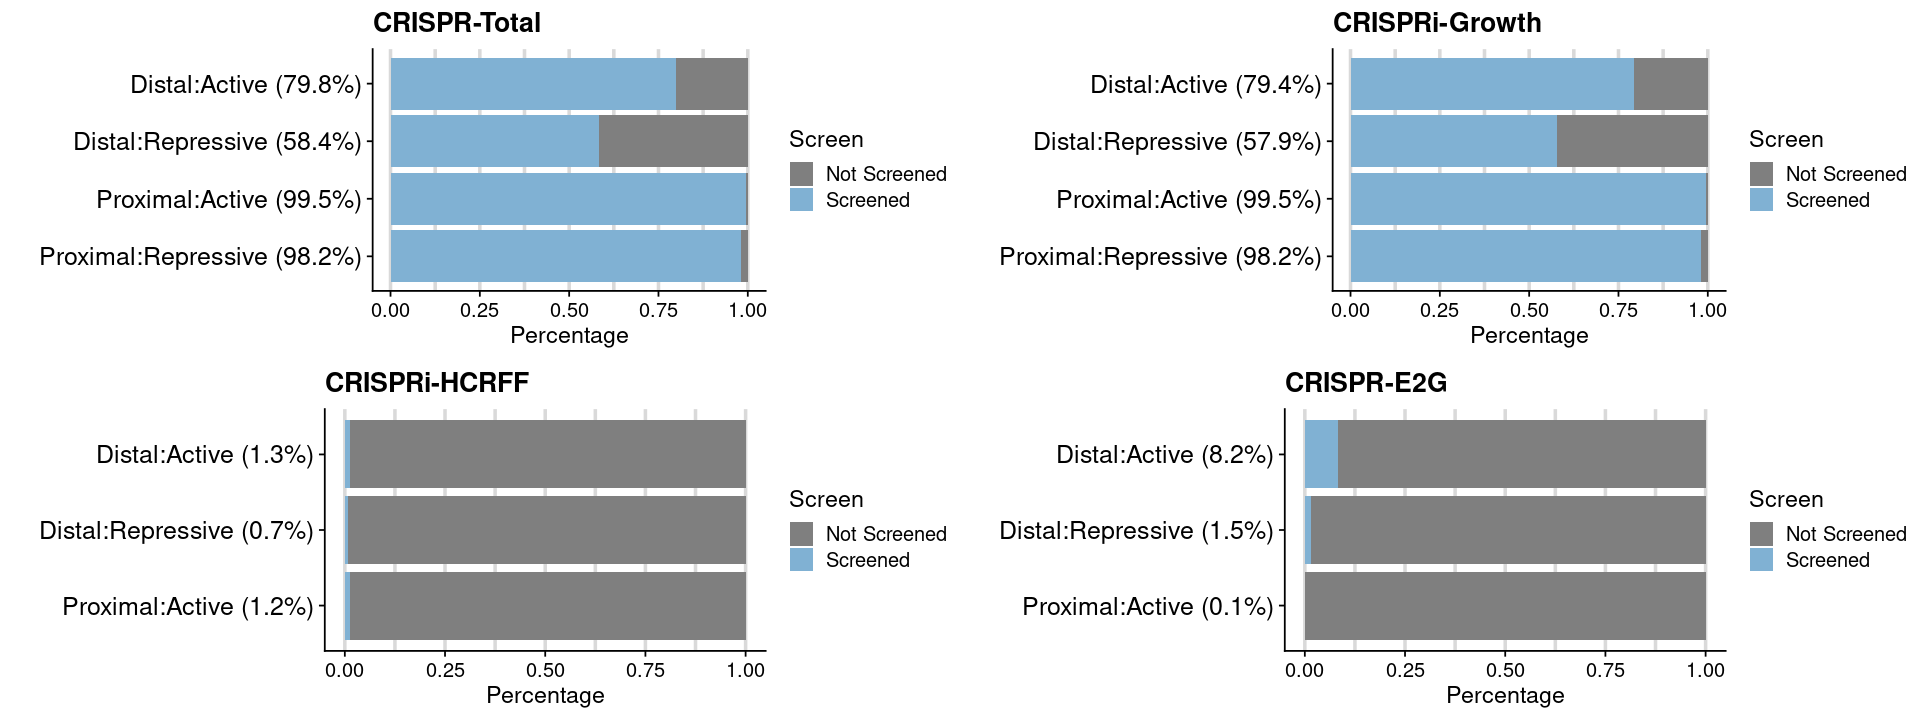

In [150]:
lst = lst_dat_label_crispr_screen

lst = lapply(names(lst), function(idx){
    ###
    dat = lst[[idx]]
    dat = dat %>% na.omit
    txt = idx

    ###
    dat = dat %>% 
        dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_label))) %>% 
        dplyr::arrange(Label) %>%
        dplyr::mutate(Label_Text = factor(Label_Text, levels=unique(Label_Text)))
    
    ###
    gpt = ggplot(dat, aes(y = Label_Text, x = Freq, fill = Screen)) + 
        geom_bar(stat = "identity") +
        scale_fill_manual(values = c("grey50", "#80b1d3")) +
        labs(x="Percentage", y = "", title = txt) +
        theme_cowplot() +
        background_grid(
            major = "x",
            minor = "x",
            size.major = 1,
            size.minor = 1,
        ) +
        theme(axis.text.y = element_text(size=15))
    return(gpt)
})

lst_gpt_label_crispr_screen = lst

options(repr.plot.height=6, repr.plot.width=16)
plot_grid(plotlist = lst, nrow = 2)

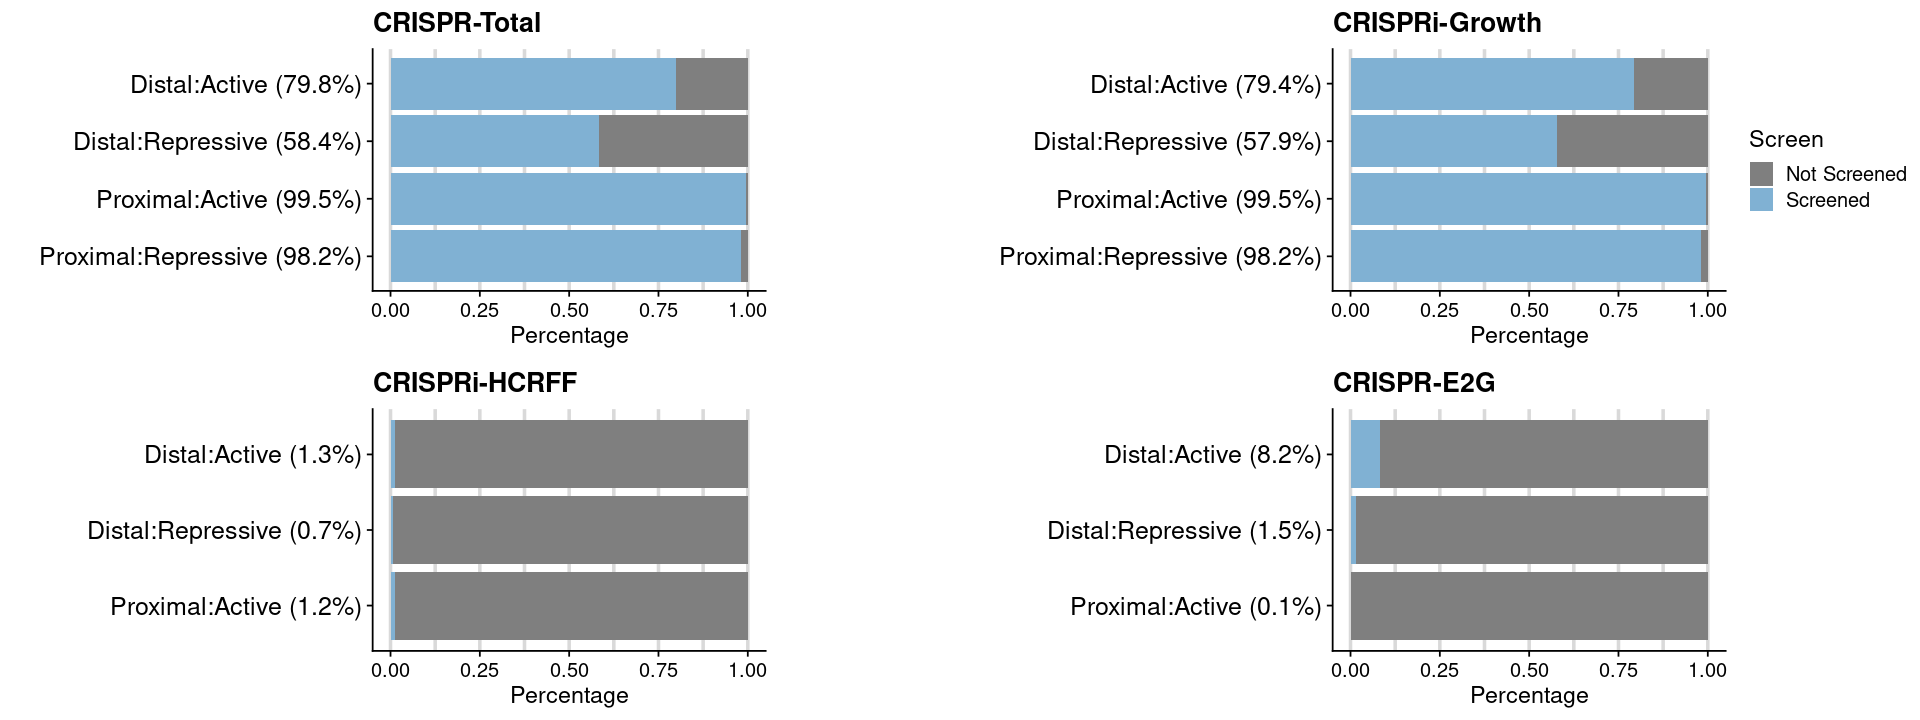

In [151]:
lst = lst_gpt_label_crispr_screen
lst[[1]] = lst[[1]] + theme(legend.position = "none")
lst[[3]] = lst[[3]] + theme(legend.position = "none")
lst[[4]] = lst[[4]] + theme(legend.position = "none")

options(repr.plot.height=6, repr.plot.width=16)
plot_grid(plotlist = lst, nrow = 2, align = "v")

In [152]:
lst = lst_region_annot
dat = lst[[1]]
head(dat)

Region,Label,Screen,Signif
<chr>,<chr>,<dbl>,<dbl>
chr1:778233-779389,Distal:Active,1,0
chr1:958722-959968,Proximal:Active,1,0
chr1:960468-961615,Proximal:Active,1,0
chr1:1005094-1005553,Distal:Active,1,0
chr1:1013154-1014482,Proximal:Active,1,0
chr1:1059012-1060137,Distal:Active,1,0


In [166]:
lst = lst_region_annot
dat = lst[[1]]

dat = dat %>% 
    dplyr::filter(Screen == 1) %>%
    dplyr::mutate(Signif = ifelse(Signif == 1, "Significant", "Not Significant")) %>%
    dplyr::distinct()
head(dat, 10)

Region,Label,Screen,Signif
<chr>,<chr>,<dbl>,<chr>
chr1:778233-779389,Distal:Active,1,Not Significant
chr1:958722-959968,Proximal:Active,1,Not Significant
chr1:960468-961615,Proximal:Active,1,Not Significant
chr1:1005094-1005553,Distal:Active,1,Not Significant
chr1:1013154-1014482,Proximal:Active,1,Not Significant
chr1:1059012-1060137,Distal:Active,1,Not Significant
chr1:1063762-1064534,Distal:Active,1,Not Significant
chr1:1068587-1070616,Distal:Active,1,Significant
chr1:1079414-1080664,Distal:Repressive,1,Not Significant


In [167]:
lst = lst_region_annot

lst = lapply(lst, function(dat){
    ### Init label
    dat = dat %>% 
        dplyr::filter(Screen == 1) %>%
        dplyr::mutate(Signif = ifelse(Signif == 1, "Significant", "Not Significant")) %>%
        dplyr::distinct()

    ### Summarize by counting each label
    dat = dat %>%
        dplyr::group_by(Label, Signif) %>%
        dplyr::summarise(Count = n(), .groups = "drop") %>%
        dplyr::group_by(Label) %>%
        dplyr::mutate(Total = sum(Count)) %>%
        dplyr::ungroup() %>%
        dplyr::mutate(Freq = Count / Total)

    ### Generate label for plotting
    tmp = dat %>%
        dplyr::filter(Signif == "Significant") %>%
        dplyr::mutate(Freq_Label = paste0(round(Freq * 100, 1), "%")) %>%
        dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Label, ")") )%>%
        dplyr::select(Label, Label_Text)

    ### Merge the label back to the table
    dat = dplyr::left_join(dat, tmp, by = "Label")
    return(dat)
})

lst_dat_label_crispr_signif = lst

In [168]:
lst = lst_dat_label_crispr_signif
lst

Label,Signif,Count,Total,Freq,Label_Text
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
Distal:Active,Not Significant,8688,9273,0.93691362,Distal:Active (6.3%)
Distal:Active,Significant,585,9273,0.06308638,Distal:Active (6.3%)
Distal:Repressive,Not Significant,913,958,0.95302714,Distal:Repressive (4.7%)
Distal:Repressive,Significant,45,958,0.04697286,Distal:Repressive (4.7%)
Proximal:Active,Not Significant,3933,4950,0.79454545,Proximal:Active (20.5%)
Proximal:Active,Significant,1017,4950,0.20545455,Proximal:Active (20.5%)
Proximal:Repressive,Not Significant,101,107,0.94392523,Proximal:Repressive (5.6%)
Proximal:Repressive,Significant,6,107,0.05607477,Proximal:Repressive (5.6%)
Label,Signif,Count,Total,Freq,Label_Text


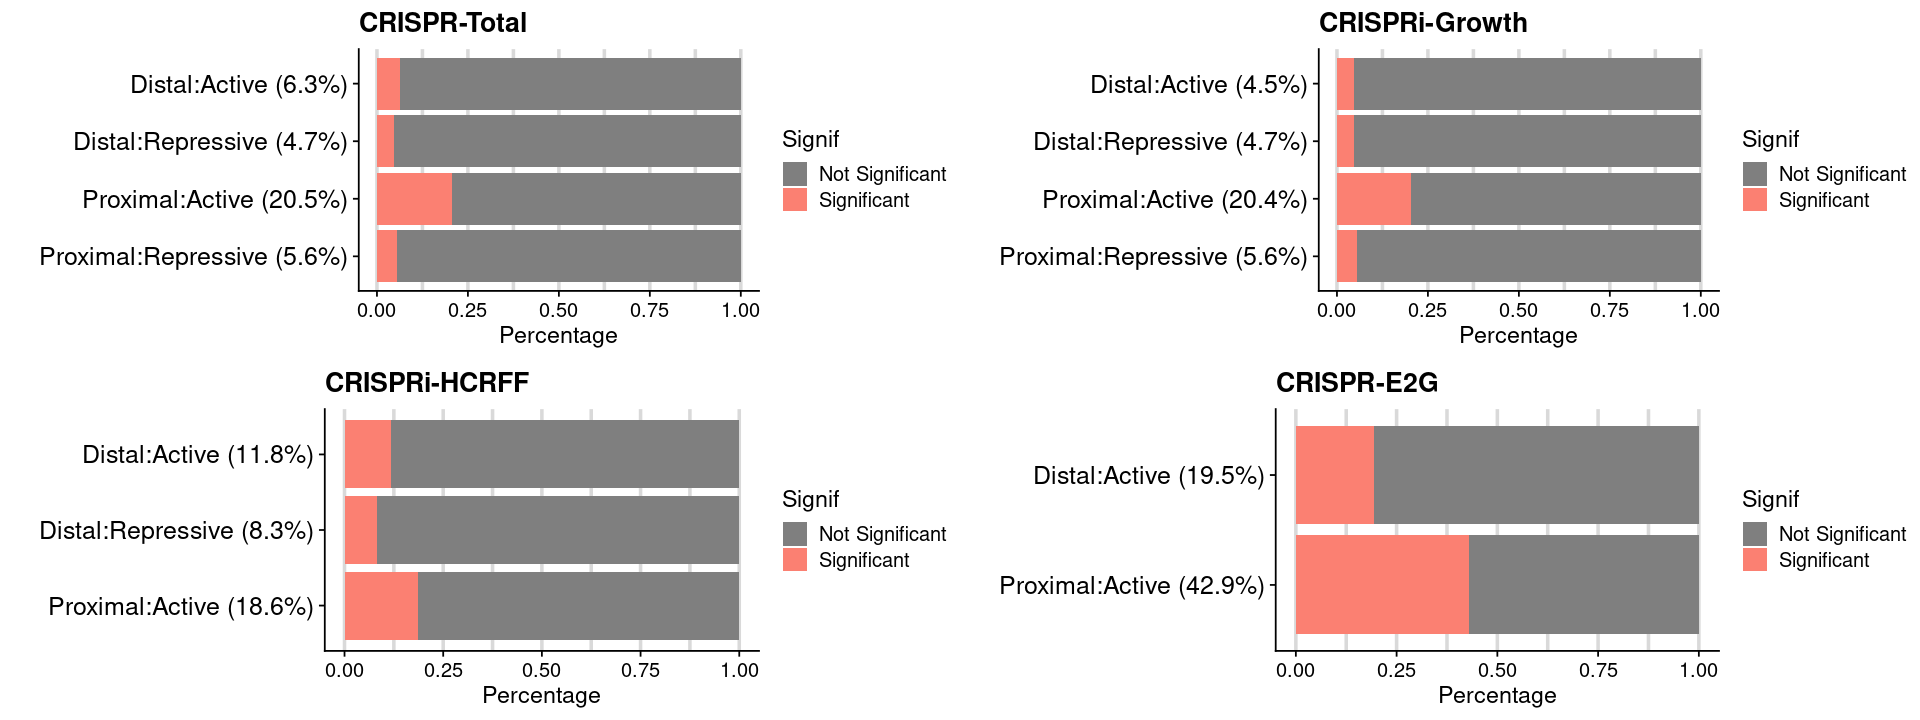

In [169]:
lst = lst_dat_label_crispr_signif

lst = lapply(names(lst), function(idx){
    ###
    dat = lst[[idx]]
    dat = dat %>% na.omit
    txt = idx

    ###
    dat = dat %>% 
        dplyr::mutate(Label = factor(Label, levels=rev(vec_txt_label))) %>% 
        dplyr::arrange(Label) %>%
        dplyr::mutate(Label_Text = factor(Label_Text, levels=unique(Label_Text)))
    
    ###
    gpt = ggplot(dat, aes(y = Label_Text, x = Freq, fill = Signif)) + 
        geom_bar(stat = "identity") +
        scale_fill_manual(values = c("grey50", "#fb8072")) +
        labs(x="Percentage", y = "", title = txt) +
        theme_cowplot() +
        background_grid(
            major = "x",
            minor = "x",
            size.major = 1,
            size.minor = 1,
        ) +
        theme(axis.text.y = element_text(size=15))
    return(gpt)
})

lst_gpt_label_crispr_signif = lst

options(repr.plot.height=6, repr.plot.width=16)
plot_grid(plotlist = lst, nrow = 2)

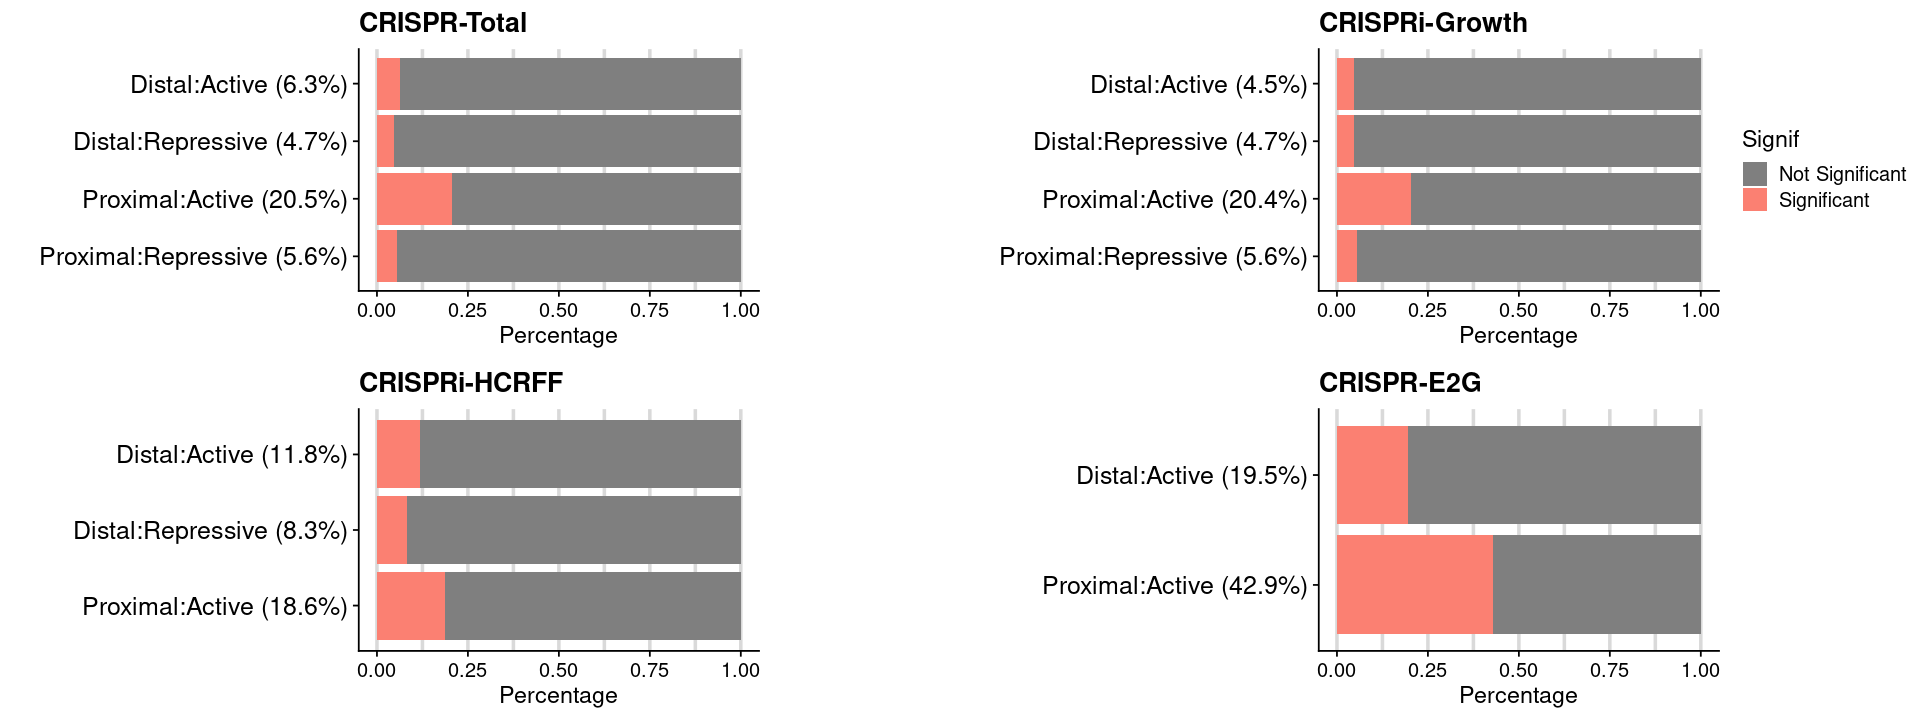

In [170]:
lst = lst_gpt_label_crispr_signif
lst[[1]] = lst[[1]] + theme(legend.position = "none")
lst[[3]] = lst[[3]] + theme(legend.position = "none")
lst[[4]] = lst[[4]] + theme(legend.position = "none")

options(repr.plot.height=6, repr.plot.width=16)
plot_grid(plotlist = lst, nrow = 2, align = "v")

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


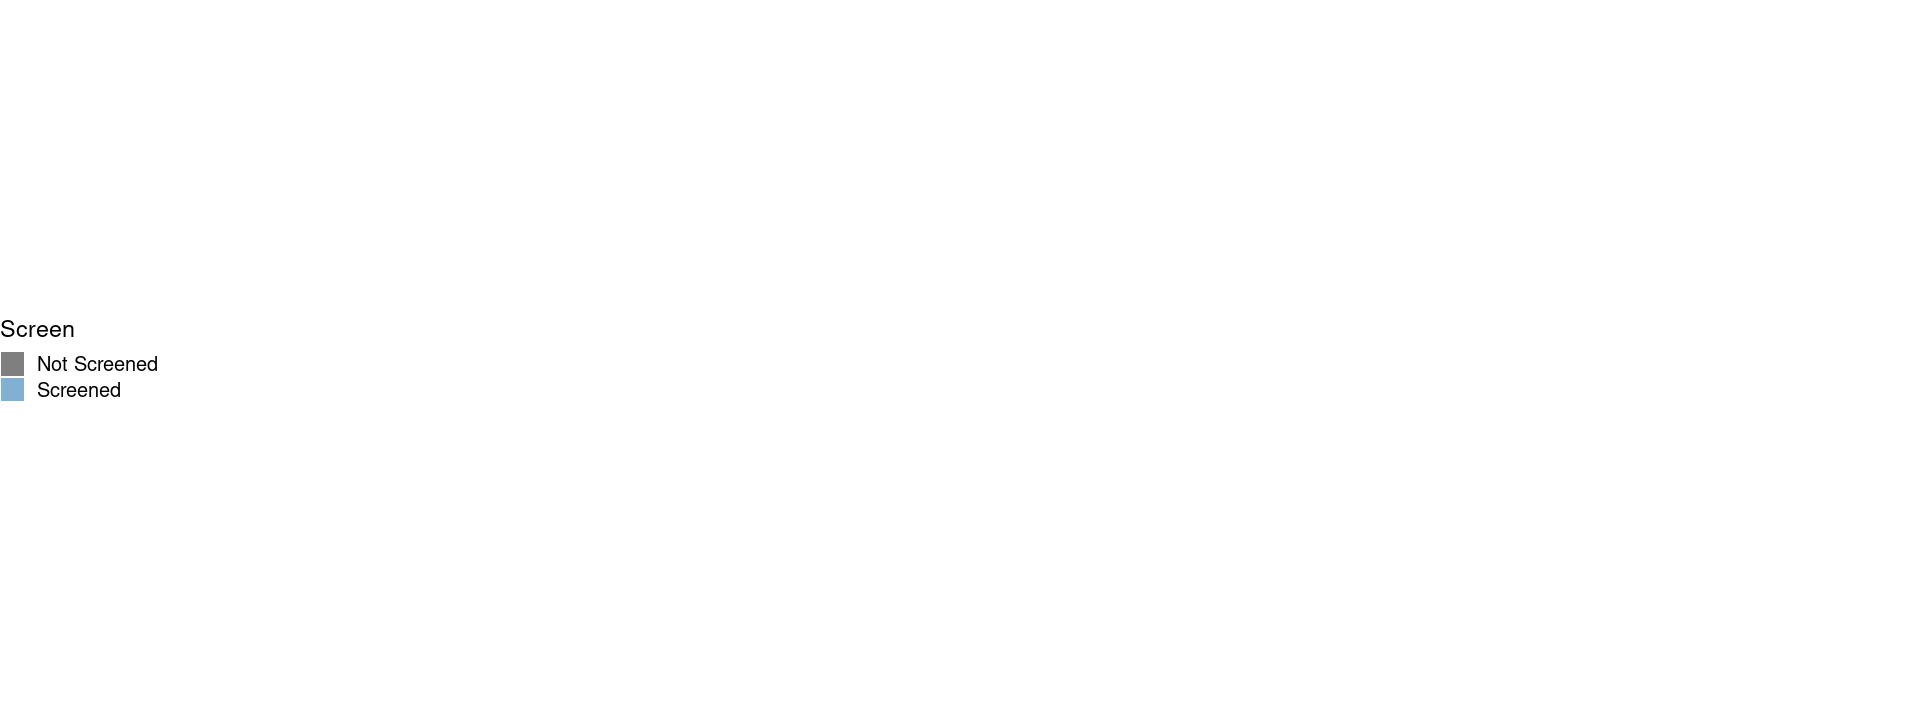

In [113]:
lst = lst_gpt_label_crispr_screen
gpt = lst[[1]]
gpt_legend = cowplot::get_legend(gpt + theme(legend.position = "right"))
gpt_legend = ggpubr::as_ggplot(gpt_legend)
gpt_legend

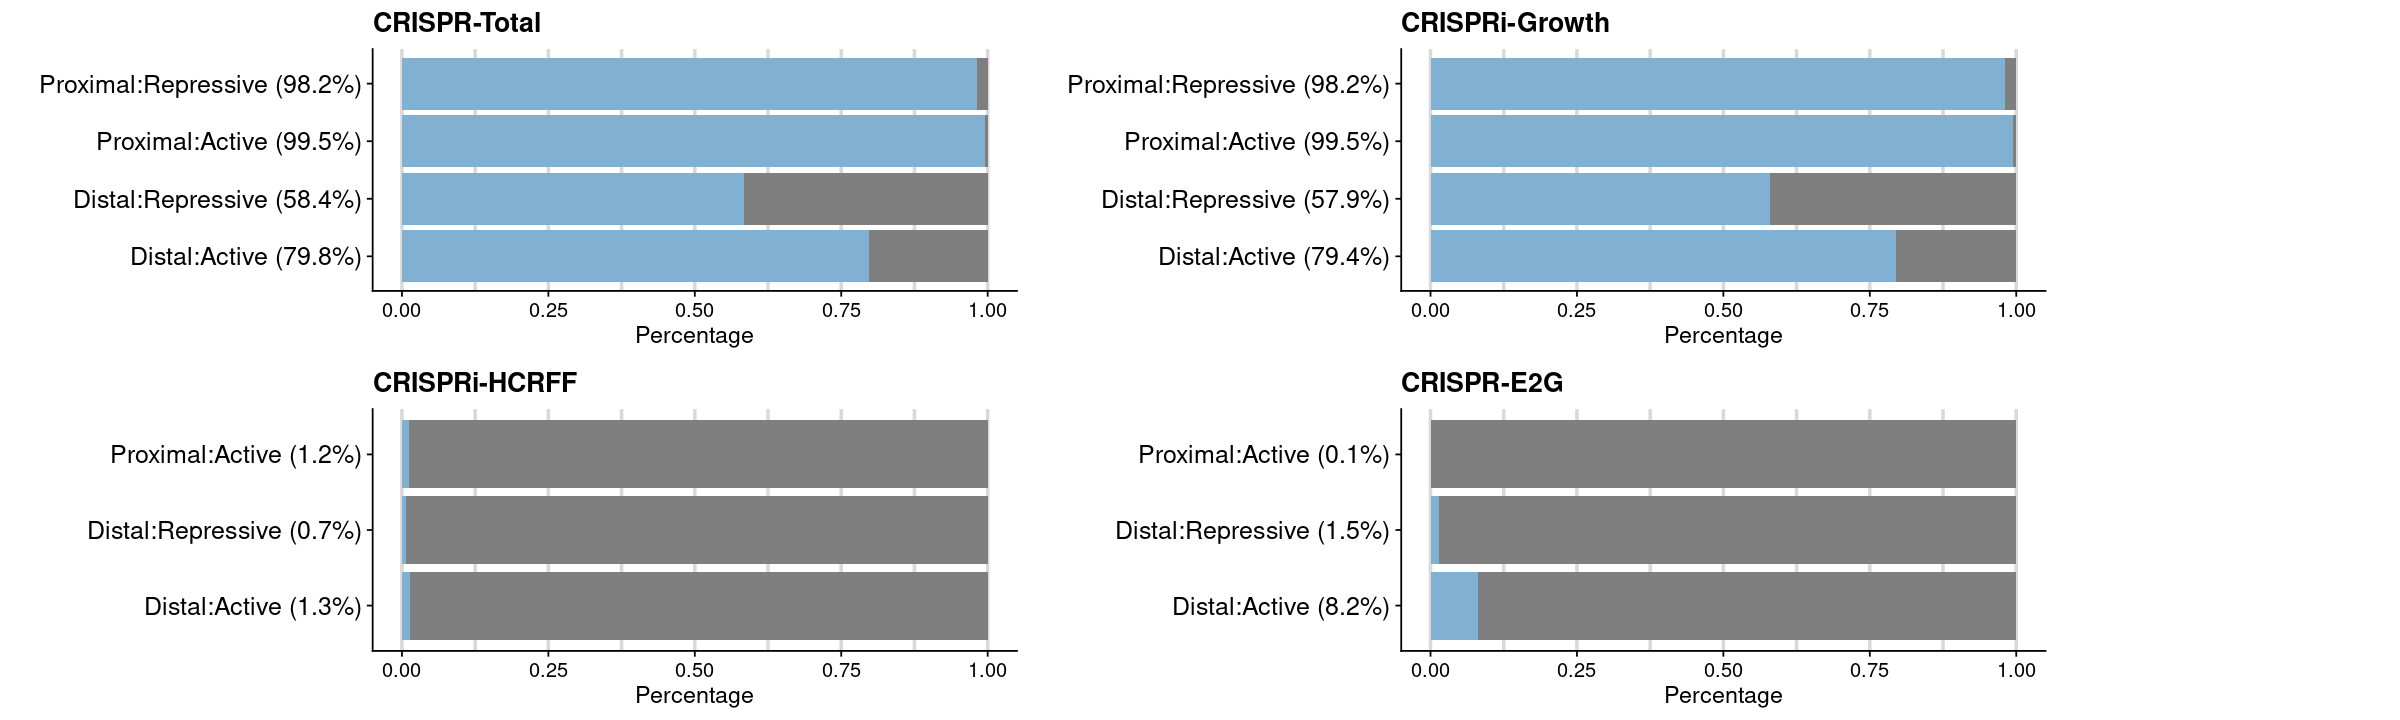

In [127]:
lst = lst_gpt_label_crispr_screen
lst = lapply(lst, function(gpt){
    gpt = gpt + theme(legend.position = "none")
    return(gpt)
})

lst = list(
    lst[[1]],
    lst[[2]],
    gpt_legend,
    lst[[3]],
    lst[[4]]
)

options(repr.plot.height=6, repr.plot.width=20)
plot_grid(plotlist = lst, nrow = 2, align = "v", rel_widths = c(3, 3, 1))

In [ ]:
options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [32]:
lst = lst_region_annot
dat = lst[[1]]

dat = dat %>% 
    dplyr::mutate(Screen = ifelse(Screen == 1, "Screened", "Not Screened")) %>%
    dplyr::distinct()

dat = dat %>%
    dplyr::group_by(Label, Screen) %>%
    dplyr::summarise(Count = n(), .groups = "drop") %>%
    dplyr::group_by(Label) %>%
    dplyr::mutate(Total = sum(Count)) %>%
    dplyr::ungroup() %>%
    dplyr::mutate(Freq = Count / Total)

dat_region_label_screen = dat
dat

Label,Screen,Count,Total,Freq
<chr>,<chr>,<int>,<int>,<dbl>
Enhancer,Not Screened,2350,11623,0.20218532
Enhancer,Screened,9273,11623,0.79781468
Silencer,Not Screened,682,1640,0.41585366
Silencer,Screened,958,1640,0.58414634
TSS:Enhancer,Not Screened,24,4974,0.00482509
TSS:Enhancer,Screened,4950,4974,0.99517491
TSS:Silencer,Not Screened,2,109,0.01834862
TSS:Silencer,Screened,107,109,0.98165138


In [40]:
dat = dat_region_label_screen
tmp = dat %>%
    dplyr::filter(Screen == "Screened") %>%
    dplyr::mutate(Freq_Label = paste0(round(Freq * 100, 1), "%")) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Freq_Label, ")") )%>%
    dplyr::select(Label, Label_Text)

dat = dplyr::left_join(dat, tmp, by = "Label")
dat

Label,Screen,Count,Total,Freq,Label_Text
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
Enhancer,Not Screened,2350,11623,0.20218532,Enhancer (79.8%)
Enhancer,Screened,9273,11623,0.79781468,Enhancer (79.8%)
Silencer,Not Screened,682,1640,0.41585366,Silencer (58.4%)
Silencer,Screened,958,1640,0.58414634,Silencer (58.4%)
TSS:Enhancer,Not Screened,24,4974,0.00482509,TSS:Enhancer (99.5%)
TSS:Enhancer,Screened,4950,4974,0.99517491,TSS:Enhancer (99.5%)
TSS:Silencer,Not Screened,2,109,0.01834862,TSS:Silencer (98.2%)
TSS:Silencer,Screened,107,109,0.98165138,TSS:Silencer (98.2%)


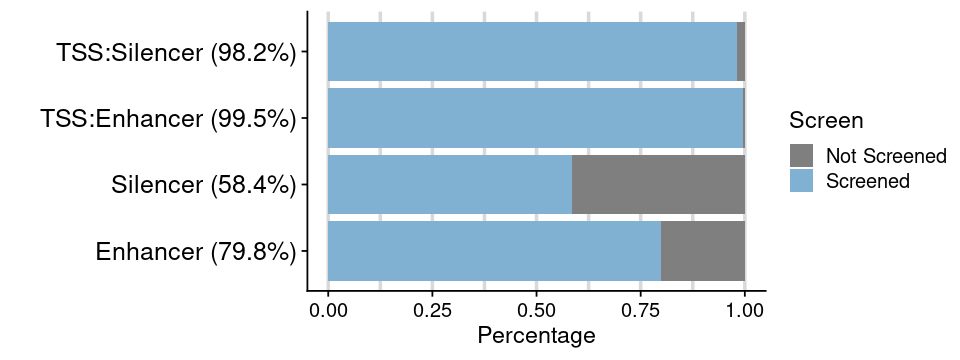

In [41]:
gpt = ggplot(dat, aes(y = Label_Text, x = Freq, fill = Screen)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = c("grey50", "#80b1d3")) +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [ ]:
dat = dat_region_annot_plot                      
gpt = ggplot(dat, aes(y = Label2, x = Freq, fill = CRISPR)) + 
    geom_bar(stat = "identity") +
    scale_fill_manual(values = c("grey50", "#fb8072")) +
    labs(x="Percentage", y = "") +
    theme_cowplot() +
    background_grid(
        major = "x",
        minor = "x",
        size.major = 1,
        size.minor = 1,
    ) +
    theme(axis.text.y = element_text(size=15))

options(repr.plot.height=3, repr.plot.width=8)
print(gpt)

In [20]:
lst = lst_region_annot
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::group_by(Label
})

Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,778233,779389,chr1:778233-779389,Enhance,3,0,0,Enhancer,Enhancer,Enhancer,1,1,0,0,0,0,0,0
chr1,958722,959968,chr1:958722-959968,Enhance,2,1,0,Enhancer,Promoter,TSS:Enhancer,1,1,0,0,0,0,0,0
chr1,960468,961615,chr1:960468-961615,Enhance,2,1,0,Enhancer,Promoter,TSS:Enhancer,1,1,0,0,0,0,0,0
chr1,1005094,1005553,chr1:1005094-1005553,Enhance,2,0,0,Enhancer,Enhancer,Enhancer,1,1,0,0,0,0,0,0
chr1,1013154,1014482,chr1:1013154-1014482,Enhance,3,1,0,Enhancer,Promoter,TSS:Enhancer,1,1,0,0,0,0,0,0
chr1,1059012,1060137,chr1:1059012-1060137,Enhance,2,0,0,Enhancer,Enhancer,Enhancer,1,1,0,0,0,0,0,0


In [ ]:
### init
dat = dat_region_annot_fcc_filter
dat = dat %>% 
    dplyr::mutate(Label = Label3) %>%
    dplyr::select(Region, Label) %>%
    dplyr::distinct()

###
res = table(dat$Label)
dat = as.data.frame(res)
colnames(dat) = c("Label", "Count")

###
dat = dat %>%
    dplyr::mutate(
        Count_Text = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000, 1), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(Label_Text = paste0(Label, " ", "(", Count_Text, ")"))

dat_region_label_count = dat
dat

In [ ]:
dat = dat_region_annot_fcc_filter
res = table(dat$Label3)

dat = dat_region_annot_summary
dat = dat %>%
    dplyr::mutate(
        Count_Label = ifelse(
            Count > 1000, 
            paste0(round(Count / 1000, 1), "K"),
            Count
        )
    ) %>%
    dplyr::mutate(Label2 = paste0(Label, " ", "(", Count_Label, ")"))

vec = c("Enhancer", "Promoter", "Repressor")
dat = dat %>% 
    dplyr::mutate(Label = factor(Label, levels=rev(vec))) %>% 
    dplyr::arrange(Label) %>%
    dplyr::mutate(Label2 = factor(Label2, levels=Label2))

dat_region_annot_plot = dat